<a href="https://colab.research.google.com/github/ilacheUFF/AgricultureSimpleDataSet/blob/main/InversoDistanciaArquivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolação Inverso da distância
### Prof Ivanovich Lache Salcedo (ilache@id.uff.br)
### Universidade federal fluminense

In [34]:
import numpy as np  #Biblioteca para manipulação de arrays
from matplotlib import pyplot as plt #Biblioteca para realizar gráficos
import pandas as pd

In [35]:
url = 'https://raw.githubusercontent.com/ilacheUFF/AgricultureSimpleDataSet/main/DadosAmostras3.csv'  #Dataset 26 Samples
url=  'https://raw.githubusercontent.com/ilacheUFF/AgricultureSimpleDataSet/main/LargeDataset.csv'    #DataSet 210 Samples
df1 = pd.read_csv(url,delimiter=';')
Matriz=df1.to_numpy()
print(Matriz)

[[1.00000000e+00 0.00000000e+00 1.40000000e+03 3.35928273e+00]
 [2.00000000e+00 1.00000000e+02 1.40000000e+03 3.57977724e+00]
 [3.00000000e+00 2.00000000e+02 1.40000000e+03 3.45638514e+00]
 [4.00000000e+00 3.00000000e+02 1.40000000e+03 3.35042834e+00]
 [5.00000000e+00 4.00000000e+02 1.40000000e+03 3.17804956e+00]
 [6.00000000e+00 5.00000000e+02 1.40000000e+03 3.12329531e+00]
 [7.00000000e+00 6.00000000e+02 1.40000000e+03 3.28588009e+00]
 [8.00000000e+00 7.00000000e+02 1.40000000e+03 3.28172111e+00]
 [9.00000000e+00 8.00000000e+02 1.40000000e+03 3.55272460e+00]
 [1.00000000e+01 9.00000000e+02 1.40000000e+03 3.48398447e+00]
 [1.10000000e+01 1.00000000e+03 1.40000000e+03 3.41168642e+00]
 [1.20000000e+01 1.10000000e+03 1.40000000e+03 3.37550735e+00]
 [1.30000000e+01 1.20000000e+03 1.40000000e+03 3.41399527e+00]
 [1.40000000e+01 1.30000000e+03 1.40000000e+03 3.49322796e+00]
 [1.50000000e+01 0.00000000e+00 1.30000000e+03 3.47856045e+00]
 [1.60000000e+01 1.00000000e+02 1.30000000e+03 3.589071

# Carregar as localizaçoes e as medições



In [36]:
pos=Matriz[:,1:3] #Valor das coordenadas dos pontos
vm=Matriz[:,3]  #Valores medidos
print(pos)



[[   0. 1400.]
 [ 100. 1400.]
 [ 200. 1400.]
 [ 300. 1400.]
 [ 400. 1400.]
 [ 500. 1400.]
 [ 600. 1400.]
 [ 700. 1400.]
 [ 800. 1400.]
 [ 900. 1400.]
 [1000. 1400.]
 [1100. 1400.]
 [1200. 1400.]
 [1300. 1400.]
 [   0. 1300.]
 [ 100. 1300.]
 [ 200. 1300.]
 [ 300. 1300.]
 [ 400. 1300.]
 [ 500. 1300.]
 [ 600. 1300.]
 [ 700. 1300.]
 [ 800. 1300.]
 [ 900. 1300.]
 [1000. 1300.]
 [1100. 1300.]
 [1200. 1300.]
 [1300. 1300.]
 [   0. 1200.]
 [ 100. 1200.]
 [ 200. 1200.]
 [ 300. 1200.]
 [ 400. 1200.]
 [ 500. 1200.]
 [ 600. 1200.]
 [ 700. 1200.]
 [ 800. 1200.]
 [ 900. 1200.]
 [1000. 1200.]
 [1100. 1200.]
 [1200. 1200.]
 [1300. 1200.]
 [   0. 1100.]
 [ 100. 1100.]
 [ 200. 1100.]
 [ 300. 1100.]
 [ 400. 1100.]
 [ 500. 1100.]
 [ 600. 1100.]
 [ 700. 1100.]
 [ 800. 1100.]
 [ 900. 1100.]
 [1000. 1100.]
 [1100. 1100.]
 [1200. 1100.]
 [1300. 1100.]
 [   0. 1000.]
 [ 100. 1000.]
 [ 200. 1000.]
 [ 300. 1000.]
 [ 400. 1000.]
 [ 500. 1000.]
 [ 600. 1000.]
 [ 700. 1000.]
 [ 800. 1000.]
 [ 900. 1000.]
 [1000. 10

## Definir localização do ponto que quer ser encontrado


In [37]:
#@title Localização do ponto desejado

Posx = 2.5 #@param {type:"number"}
Posy = 2.5 #@param {type:"number"}


## Mostrar os valores



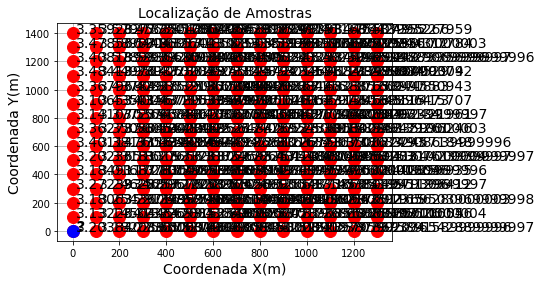

In [38]:
fss=14 #Tamanho do texto
plt.figure()
plt.plot(pos[:,0],pos[:,1],'or',markersize=12)
plt.ylabel("Coordenada Y(m)",fontsize=fss)
plt.xlabel("Coordenada X(m)",fontsize=fss)
plt.title("Localização de Amostras",fontsize=fss)
plt.grid()

maxx=np.amax(pos[:,0])
dx=maxx/100

for indice in range(np.size(pos,0)):
    plt.text(pos[indice,0]+dx,pos[indice,1],str(vm[indice]),fontsize=fss)

plt.plot(Posx,Posy,'ob',markersize=12)
plt.text(Posx+dx,Posy,'?',fontsize=fss, fontweight='bold');

##Cálculo das distancias entre todos los pontos e o ponto desejado

In [39]:
difDis=pos-[Posx,Posy] #Diferença entre as distancias

d2=difDis*difDis   #Quadrado das diferença
d3=np.sum(d2,1)
distancia=np.sqrt(d3) #Raiz cuadrado das somas 


##Cálculo do peso de cada mostra

In [40]:
potencia=2 
inverso=1/(np.power(distancia,potencia))
soma_inverso=np.sum(inverso)


w=inverso/soma_inverso



##O valor desejado $V_d$ é igual a $V_d=\sum w V_m$

##onde $w$ é o peso dado para cada medida $V_m$

In [41]:
vd=np.sum(vm*w)
print("Valor inferido é igual a ",vd)

Valor inferido é igual a  3.2042550808971684




---



---


#Realizar o cálculo para varios pontos


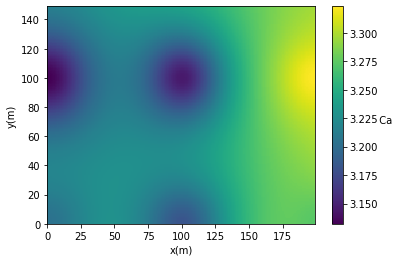

In [51]:
#Define os limites da area que será interpolada
xmin=0
ymin=0
xmax=200
ymax=150
step=1  
potencia=2

def CalcularValor(distancia, vm,potencia=2): 
  inverso=1/(np.power(distancia,potencia))
  soma_inverso=np.sum(inverso)
  w=inverso/soma_inverso
  vd=np.sum(vm*w)
  return vd
def CalcularDistancias(Pos,vm,NPos):
  difDis=pos-NPos #Diferença entre as distancias
  d2=difDis*difDis   #Quadrado das diferença
  distancia=np.sqrt(np.sum(d2,1)) #Raiz cuadrado das somas 
  return distancia



#Inicializa os indices o os elementos para graficar
indicex=0  
indicey=0
X=np.zeros((np.size(np.arange(xmin,xmax,step)),np.size(np.arange(ymin,ymax,step))))
Y=np.zeros((np.size(np.arange(xmin,xmax,step)),np.size(np.arange(ymin,ymax,step))))
VD=np.zeros((np.size(np.arange(xmin,xmax,step)),np.size(np.arange(ymin,ymax,step))))

#Avalia cada posição da malha
for x in np.arange(xmin,xmax,step):
  for y in np.arange(ymin,ymax,step):
    dis=CalcularDistancias(pos,vm,np.array([x,y])) #Calcula as distancias
   
    if (np.min(dis)>0):   #Se o ponto não pertence a um ponto conhecido
      vd=CalcularValor(dis,vm,potencia)
      X[indicex,indicey]=x
      Y[indicex,indicey]=y
      VD[indicex,indicey]=vd     
    else:
      indice=np.where(dis==0)
      X[indicex,indicey]=pos[indice,0]
      Y[indicex,indicey]=pos[indice,1]
      VD[indicex,indicey]=vm[indice]
    indicey=indicey+1

  indicey=0
  indicex=indicex+1


#Apresenta a interpoação
plt.pcolormesh(X,Y,VD)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
cbar = plt.colorbar()
cbar.set_label('  Ca', rotation=0)
plt.show()

